In [ ]:
#Import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,  recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Nouvelle section

In [ ]:
df=pd.read_csv("creditcard.csv")

In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#checking the percentage of each class in the dataset
(df.Class.value_counts())/(df.Class.count())

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [ ]:
#Descriptive statistics for Fraudulent Transactions
print("Fraudulent Transactions")
df['Amount'][df['Class']==1]. describe()

Fraudulent Transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#Descriptive statistics for Genuine Transactions
print("Genuine Transactions")
df['Amount'][df['Class']==0]. describe()


Genuine Transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

We can see that we can't extract much information from amount feature.


In [ ]:
# Normalize pixel values to be between 0 and 1
state = 42  
test_size = 0.20  
train_data=df.copy()
y_train=df.Class
#We drop Time and Amount because they don't give any valuable information  
#We drop class column because its the  target that we should predict
train_data.drop(labels=["Class","Amount","Time"], axis=1, inplace=True)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_data)
X_train, X_test,y_train, y_test= train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)

In [ ]:
X_train.shape

(227845, 28)

In [ ]:
y_train.shape

(227845,)

#Deep Neural Network

We will build a 3-layer deep neural networking using the Sequential model 

We use Rectified Linear Unit (ReLU) as an activation function for the hidden layers. ReLU normally performs better than Sigmoid and Hyperbolic Tangent functions when building deep neural networks. This is because Sigmoid and Tanh tends to saturate when the input value is either too large or too small

We use the Sigmoid function in the output layer for a binary classification problem. 

In [ ]:
model = Sequential()
model.add(Dense(3139, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(500, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Summary of Model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 3139)              91031     
_________________________________________________________________
dense_23 (Dense)             (None, 500)               1570000   
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 501       
Total params: 1,661,532
Trainable params: 1,661,532
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile and train the model
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=20,validation_data=(X_test, y_test), batch_size=64)

Epoch 1/20
3561/3561 [==============================] - 10s 3ms/step - loss: 0.0101 - accuracy: 0.9964 - val_loss: 0.0048 - val_accuracy: 0.9991
Epoch 2/20
3561/3561 [==============================] - 10s 3ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 3/20
3561/3561 [==============================] - 10s 3ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0051 - val_accuracy: 0.9991
Epoch 4/20
3561/3561 [==============================] - 10s 3ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 5/20
3561/3561 [==============================] - 10s 3ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9991
Epoch 6/20
3561/3561 [==============================] - 10s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9992
Epoch 7/20
3561/3561 [==============================] - 10s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0033 - val_ac

In [ ]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1781/1781 [==============================] - 3s 2ms/step - loss: 0.0035 - accuracy: 0.9994

accuracy: 99.94%


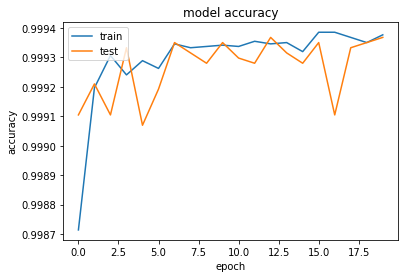

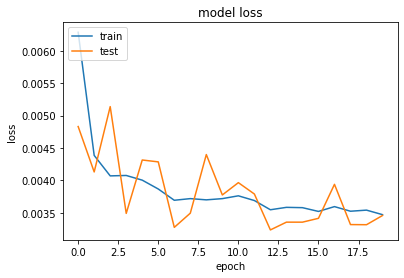

In [ ]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

99.94% is a good accuracy. However, for fraud detection, detecting Positive (Frauds) matters more than detecting Negative. Therefore, we need better metrics.

In [ ]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#Confusion Matrix
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix :
[[56853    11]
 [   25    73]]


In [ ]:
print("recall score : ",recall_score(y_test, y_pred))

recall score :  0.7448979591836735


In [ ]:
# Precsion, recall, f1-score
print("Classification report")
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.74      0.80        98

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



About 25% of frauds are misclassified as non-frauds 

## KNN

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
#Confusion Matrix
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix :
[[56859     5]
 [   24    74]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
print("kNN Accuracy= ",accuracy_score(y_test, y_pred)*100)

kNN Accuracy=  99.94908886626172


For KNN Algorithm, we can see that accuracy is about 99.95% and about 24% of frauds are misclassified as non-frauds (less than DNN). In addition f1-score, precision, accuracy and recall of KNN are better than DNN metrics

## Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
print("Random Forest accuracy :",accuracy_score(y_test, y_pred)*100)

Random Forest accuracy : 99.95786664794073


In [ ]:
#Confusion Matrix
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix :
[[56862     2]
 [   22    76]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



For Random Forest model, we can see that accuracy is about 99.96% and about 21% of frauds are misclassified as non-frauds (less than DNN and KNN). In addition f1-score, precision, accuracy and recall of Random Forest are better than DNN metrics and KNN metrics.

In conclusion, we can say that random forest model can accurately predict Class (the target) better thant KNN and DNN.